In [1]:
import pandas  as pd
import numpy as np

In [2]:
df=pd.read_csv('bank.csv')

In [3]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [4]:
df=pd.read_csv('bank.csv', sep=';')# reload file using";"" as separator

In [5]:
df.shape

(4521, 17)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df['y'].value_counts()# target coloumn

y
no     4000
yes     521
Name: count, dtype: int64

In [10]:
#seprating feature(x) and target(y)
x=df.drop('y',axis=1)
y=df['y']

In [11]:
x.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [12]:
# category vs numerical columns
cat_col=x.select_dtypes(include='object').columns
num_col=x.select_dtypes(include='int64').columns

In [13]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [14]:
num_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [15]:
#Encoding
x_encoded=pd.get_dummies(x,columns=cat_col,drop_first=True)

In [16]:
x_encoded.shape

(4521, 42)

In [17]:
#Each category is now converted into a yes/no column (1/0)

In [18]:
x_encoded.head

<bound method NDFrame.head of       age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0      30     1787   19        79         1     -1         0            False   
1      33     4789   11       220         1    339         4            False   
2      35     1350   16       185         1    330         1            False   
3      30     1476    3       199         4     -1         0            False   
4      59        0    5       226         1     -1         0             True   
...   ...      ...  ...       ...       ...    ...       ...              ...   
4516   33     -333   30       329         5     -1         0            False   
4517   57    -3313    9       153         1     -1         0            False   
4518   57      295   19       151        11     -1         0            False   
4519   28     1137    6       129         4    211         3             True   
4520   44     1136    3       345         2    249         7            False  

In [19]:
from sklearn.model_selection import train_test_split #

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()

In [22]:
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression(max_iter=500)
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [26]:
y_pred=model.predict(x_test_scaled)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
confusion_matrix(y_test,y_pred)

array([[777,  24],
       [ 74,  30]])

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94       801
         yes       0.56      0.29      0.38       104

    accuracy                           0.89       905
   macro avg       0.73      0.63      0.66       905
weighted avg       0.87      0.89      0.88       905



# For NO
# Recall: outof all actual 'NO' customers ,how many did we coreectely identify
#correctly predicted:777
# actual no:801
# so recall is very high. our model almost never misses customers who ould say NO
# precision:Whem the model says 'NO' how often is it correct
# precision score:


# F1-score:Balce btn precision and recall
# F1-score: 0.94
#meaning the model is extremly good at identifying customers who will say no


"""
# for YES
# support is 104
# meaning only 104 customers actually said yes
# Recall:out of all customers who actually said YES how many did we identified
# Recall score=0.29
# Meaing  we only identified 29% of actual intrested customers
# 71% were missed
# Actual YES=104
# YES predictions=30
# the model is missing almost most customers who would actually say YES

# precision:when the model  predicts YES HOW OFTEN it is correct 
# precision score

# Accuracy=0.89
# 89% looks good but the model

"""
 macro_avg precision=0.73
  recall=0.63
  F1-SCORE=0.86


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0, 0.5, 'count')

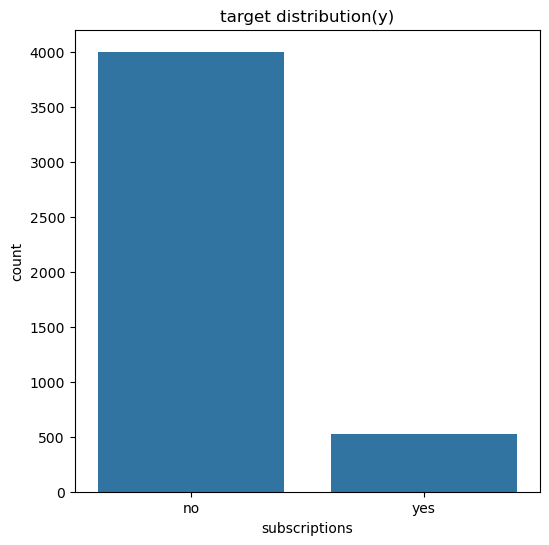

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x='y',data=df)
plt.title("target distribution(y)")
plt.xlabel("subscriptions")
plt.ylabel("count")


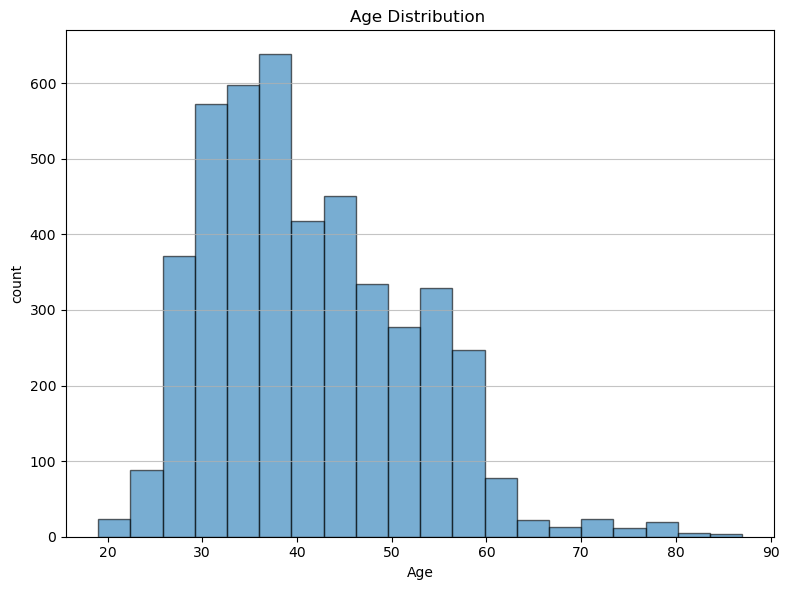

In [32]:
# Age Distribution
plt.figure(figsize=(8,6))
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.6)
plt.title("Age Distribution ")
plt.xlabel("Age")
plt.ylabel("count")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

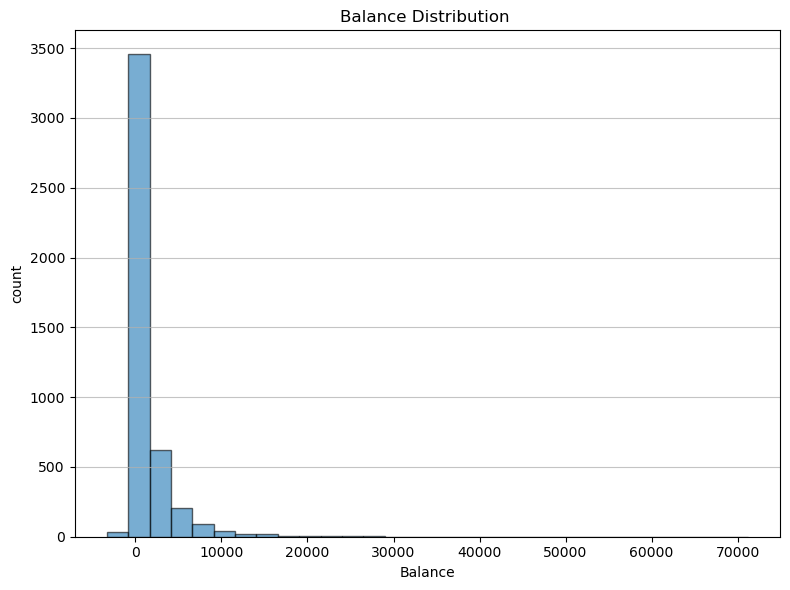

In [33]:
# Balnce Distribution
plt.figure(figsize=(8,6))
plt.hist(df['balance'], bins=30, edgecolor='black', alpha=0.6)
plt.title("Balance Distribution ")
plt.xlabel("Balance")
plt.ylabel("count")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()


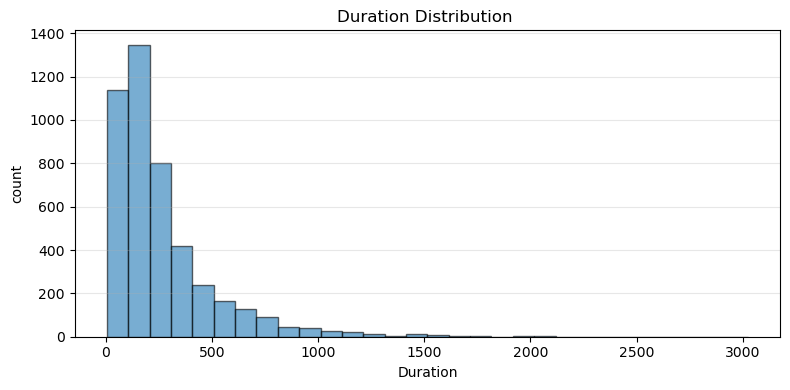

In [34]:
#duration Distribution
plt.figure(figsize=(8,4))
plt.hist(df['duration'], bins=30, edgecolor='black', alpha=0.6)
plt.title("Duration Distribution ")
plt.xlabel("Duration")
plt.ylabel("count")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
